In [20]:
# Import the necessary packages
import cv2
import numpy as np

def non_max_suppression_vectorized(boxes, overlapThresh):
    # Check if there are no boxes
    if len(boxes) == 0:
        return []
    
    # Convert the bounding boxes integers to floats
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
        
    # Initialize the list of picked indexes
    pick = []
    
    # Hold the coordinates of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    
    # [DEBUG]
    print(f"y2 before sorting\n{y2}")
    
    # Calculate the area of the bounding boxes and sort them by the bottom-right y-coordinate
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
          
    # [DEBUG]
    print(f"area\n{area}")
    
    # [DEBUG]
    print(f"y2 after sorting\n{y2}")
    print(f"idxs\n{idxs}")      
    
    # Loop through the indexes list
    while len(idxs) > 0:
        # Fetch the last index in the indexes list and add the index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        
        # [DEBUG]
        print(f"last is {last} idxs[:{last}] is {idxs[:last]}")
        
        # Find the largest (x, y) coordinates for the start of the bounding box and the smallest (x, y) coordinates for the end
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        
        # Compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        
        # Find the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]
        
        # DEBUG
        print(f"Overlap check result\n{np.where(overlap > overlapThresh)}")
        
        # DEBUG
        print(f"After concatenation\n{np.concatenate(([last], np.where(overlap > overlapThresh)[0]))}")
        
        # DEBUG
        print(f"After delete\n{np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))}")
        
        # Delete all indexes from the index list
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))
        
        # DEBUG
        print(f"What is inside pick\n{pick}")
        
    # Return only the bounding boxes picked
    return boxes[pick].astype("int")

In [21]:
# Construct a list containing the images that will be examined along with their respective bounding boxes
images = [
    ("C:/Users/fatih.gokmenoglu/Downloads/audrey.png", np.array([
    (12, 84, 140, 212),
    (24, 84, 152, 212),
    (36, 84, 164, 212),
    (12, 96, 140, 224),
    (24, 96, 152, 224),
    (24, 108, 152, 236)]))]

# Loop over the images
for (imagePath, boundingBoxes) in images:
    # Load the image and clone it
    print(f"The number of initial bounding boxes: {len(boundingBoxes)} ")
    image = cv2.imread(imagePath)
    orig = image.copy()
    
    # Loop over the bounding boxes for each image and draw them
    for (startX, startY, endX, endY) in boundingBoxes:
        cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 0, 255), 2)
        
    # Perform non-maximum suppression on the bounding boxes
    pick = non_max_suppression_vectorized(boundingBoxes, 0.3)
    print(f"The number of bounding boxes after applying non-maximum suppression: {len(pick)}")
    
    # Loop over the picked bounding boxes and draw them
    for (startX, startY, endX, endY) in pick:
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        
    # Display the images
    cv2.imshow("Original", orig)
    cv2.imshow("After NMS", image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

The number of initial bounding boxes: 6 
y2 before sorting
[212. 212. 212. 224. 224. 236.]
area
[16641. 16641. 16641. 16641. 16641. 16641.]
y2 after sorting
[212. 212. 212. 224. 224. 236.]
idxs
[0 1 2 3 4 5]
last is 5 idxs[:5] is [0 1 2 3 4]
Overlap check result
(array([0, 1, 2, 3, 4], dtype=int64),)
After concatenation
[5 0 1 2 3 4]
After delete
[]
What is inside pick
[5]
The number of bounding boxes after applying non-maximum suppression: 1


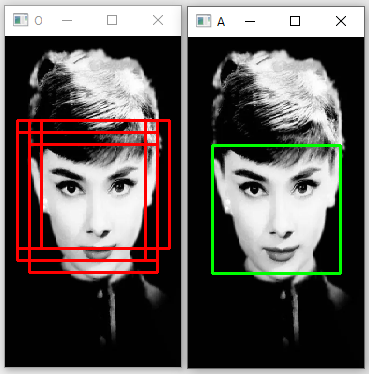